# ETS Decomposition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Additive Model

$y_t = Level + Trend + Seasonality + Noise$

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#dtype = {'region': str, 'sales_representative': np.int64, 'sales_amount': float}

In [4]:
df=pd.read_excel('Total_final_kc.xlsx', index_col='TS', parse_dates=True, dtype={'Value':float})

df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)

#df['Value']



In [5]:
df_day=df.resample(rule='D').sum()

#df_day

df_day.drop(df_day.index[335], inplace=True)    #일수 기준으로 335일이다.

series_day = df_day['Value']

In [6]:
series_day.head()

TS
2019-10-01    77324.7
2019-10-02    76038.6
2019-10-03    76977.6
2019-10-04    77042.7
2019-10-05    77223.0
Freq: D, Name: Value, dtype: float64

In [7]:
result_add = seasonal_decompose(series_day, model='additive')

In [8]:
def plot_decompose(decomposeresult):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
    decomposeresult.observed.plot(legend=False, ax=ax1)
    ax1.set_ylabel('Observerd')
    decomposeresult.trend.plot(legend=False, ax=ax2)
    ax2.set_ylabel('Trend')
    decomposeresult.seasonal.plot(legend=False, ax=ax3)
    ax3.set_ylabel('Seasonal')
    decomposeresult.resid.plot(legend=False, ax=ax4)
    ax4.set_ylabel('Resid')

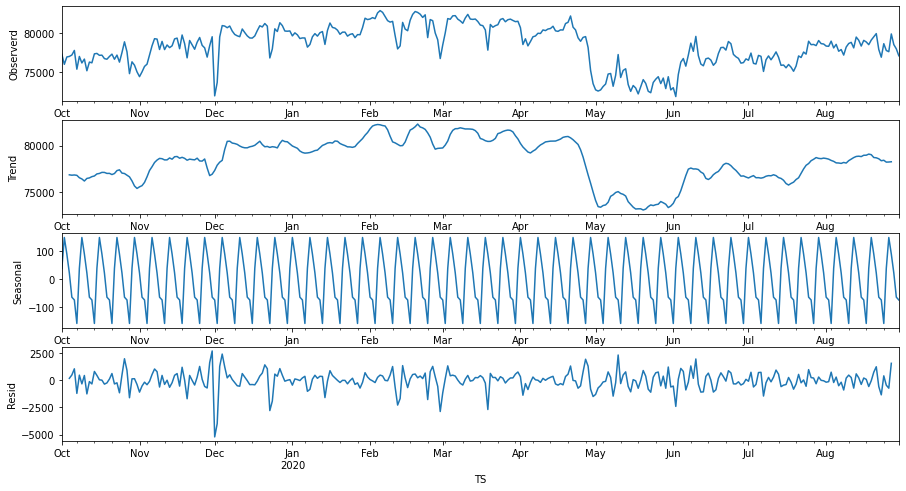

In [9]:
plot_decompose(result_add)

### Multiplicative Model

$y_t = Level \times Trend \times Seasonality \times Noise$

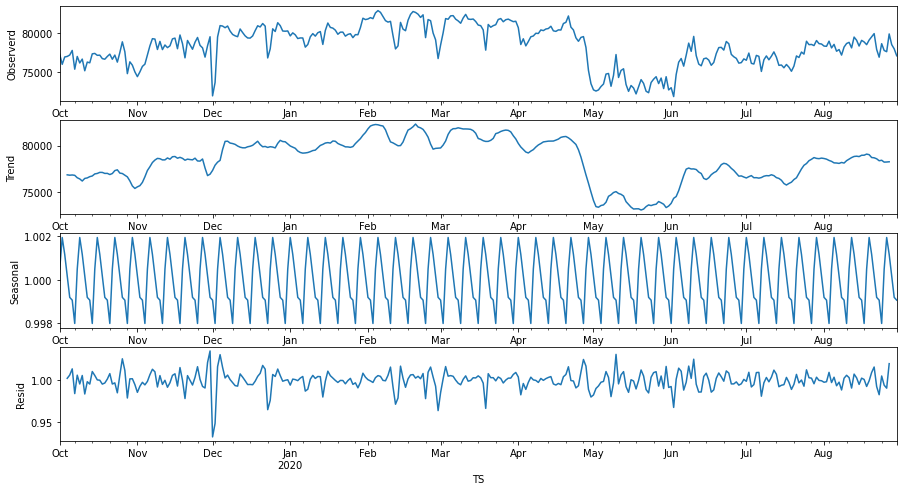

In [10]:
result_mul = seasonal_decompose(series_day, model='multiplicative')
plot_decompose(result_mul)

## ETS

linear trend 를 가지고 있고 seasonality 와 trend 컴포넌트가 시간흐름에 따라 고정적일 때 (ex 매년 승객 1만명 증가) additive model 을 사용합니다. non-linear 하게 증가하거나 감소하는 trend 를 보일 경우 (ex 매년 승객 수 두 배 증가) multiplicative model 이 더 적합합니다.

챠트를 보면 초기에 비해 후기로 갈 수록 꾸준히 증가하는 비율로 비선형 증가 추세를 보이고 있습니다.

In [11]:
df=pd.read_excel('Total_final.xlsx', index_col='TS', parse_dates=True, dtype={'Value':float})

In [12]:
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)

In [13]:
df.index = pd.to_datetime(df.index)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33503 entries, 2019-10-01 00:15:00 to 2020-09-13 23:45:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   33503 non-null  float64
dtypes: float64(1)
memory usage: 523.5 KB


In [15]:
#df.drop(['Dates'], axis=1, inplace=True)
df.drop(df.index[347], inplace=True)

In [16]:
df=df.resample(rule='D').sum()

In [17]:
df.head()

,Value
TS,
2019-10-01,77324.7
2019-10-02,76038.6
2019-10-03,76977.6
2019-10-04,76219.2
2019-10-05,77223.0


In [18]:
df.tail()

,Value
TS,
2020-09-09,77844.9
2020-09-10,78377.4
2020-09-11,76560.6
2020-09-12,76635.9
2020-09-13,75723.9


In [19]:
result = seasonal_decompose(df['Value'], model='multiplicative', freq=7) 
#freq=7 은 주기가 일주일이므로 7을 표기한 것이다.
#index의 경우 업그레이드 때문에 사용이 중지되었다.
#주기가 명확한 경우 freq를 사용하지 않아도 원하는 값이 나오기는 한다.

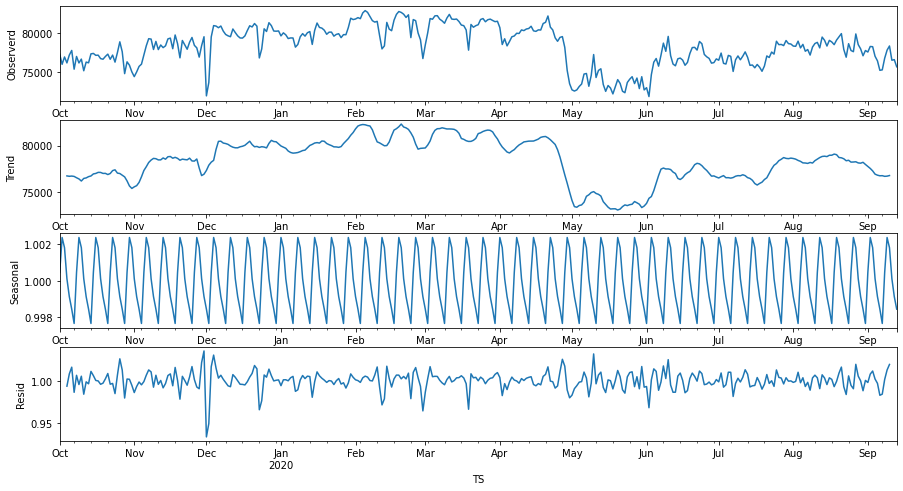

In [20]:
plot_decompose(result)